# Tarea 3: Clasificacion II + Clustering

Felipe Bravo, Hernán Sarmiento, Aymé Arango, Alison Fernandez, Cinthia Mabel Sánchez, Juan-Pablo Silva

**Noviembre 2020**

## ============= Declaración de compromiso ético =============

Nosotros ****Nicolás Herrera, Sebastián Urbina y Samuel Sánchez**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos o tres personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalice el laboratorio, **genere un archivo HTML** usando jupyter (ver tutorial 2) y súbalo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura de la tarea

Esta tarea consiste en 3 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección introductoria para familiarizarse con métodos de clustering. Finalmente la tercera parte es un problema abierto de clasificación donde deberá usar todos los conocimientos que ha adquirido en el curso hasta este momento. Esos conocimientos incluyen exploración de datos, limpieza, entrenamiento de modelos, selección y evaluación.

# Parte 1: Teoría




**1.** Explique para qué se usan variables de holgura en el problema de optimización de la SVM. 

>Respuesta:

**2.** John Doe, un consultor en minería de datos, argumenta lo siguiente: lo malo de las SVMs es que para que encuentren límites de decisión no lineales tengo que proyectarlas manualmente a más dimensiones con una función $\phi(x)$ que tengo que diseñar de manera manual. Esto hace que todo sea mucho más caro computacionalmente pues todas las operaciones las tengo que hacer sobre el espacio transformado. Discuta el argumento de John Doe.

>Respuesta:



**3.** Usando un clasificador Naive Bayes con Laplace Smoothing entrenado con los datos de la tabla de más abajo, clasifique el siguiente ejemplo a la clase Evade: **[Refund= YES, Marital Status = Divorced]**.

Hint: Tiene que comparar P(Evade=Yes | datos) vs P(Evade=No|datos). Muestre todos sus cálculos.

Refund | Marital Status | Evade
--- | --- | ---
YES | Single | NO
NO | Married | NO
NO | Single | NO
YES | Married | NO
NO | Divorced | YES
NO | Married | NO
YES | Divorced | NO
NO | Single | YES
NO | Married | NO
NO | Single | YES

>Respuesta:

**4.** Explique cómo bisecting k-mean soluciona el problema de la inicialización de centroides de k-means.

>Respuesta:

**5.** Explique cómo encontrar outliers en los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

>Respuesta:

**6.** Describa una ventaja y desventaja de los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

>Respuesta:

**7.** En DBSCAN el parametro `eps` es crucial para obtener buenos clusters. Explique una forma de encontar el valor de `eps`.

>Respuesta:

**8.** Evaluar clusters no es una tarea fácil. Qué formas de evaluar clusters conoce? Nombre 3 formas de validación y describa cómo podría determinar si los cluters son buenos o malos usando cada una de las formas nombradas.

>Respuesta:

# Parte 2: Clustering

Para esta parte usaremos el dataset de cantidad de denuncias por 100 mil habitantes por tipo de delito desde el año 2001 al 2016 en Chile (Fuente: http://www.seguridadpublica.gov.cl/estadisticas/tasa-de-denuncias-y-detenciones/delitos-de-mayor-connotacion-social-series-de-datos-2001-2017/).

Ejecute el siguiete código para cargar el dataset:

In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/denuncias-2001-2016.txt", sep=" ")
dataframe

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
1,Arica,2001,1.6,370.3,NaN,9.5,NaN,107.2,16.4
2,Arica,2002,1.1,346.7,NaN,34.0,NaN,122.8,14.9
3,Arica,2003,1.6,460.1,464.4,52.8,172.2,196.2,15.5
4,Arica,2004,1.1,452.2,395.0,64.1,203.7,143.8,13.9
5,Arica,2005,0.0,421.8,287.8,58.4,144.2,144.7,7.5
...,...,...,...,...,...,...,...,...,...
5532,Peñaflor,2012,1.1,375.0,436.5,78.6,59.3,191.5,14.8
5533,Peñaflor,2013,0.0,370.0,408.1,107.6,77.4,213.0,14.6
5534,Peñaflor,2014,1.1,301.3,376.3,112.6,65.1,224.0,5.5
5535,Peñaflor,2015,0.0,321.6,334.7,111.9,73.9,199.9,7.6


Utilizaremos sólo los datos del 2006. Ejecute las siguientes líneas de código para filtrar los datos:

In [2]:
X = dataframe[dataframe["anio"] == 2006]
X = X.drop(columns=["comuna", "anio"])
X

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0
70,0.6,680.3,327.2,211.5,169.7,287.0,18.2
...,...,...,...,...,...,...,...
5462,2.8,359.0,451.3,44.0,27.0,293.8,5.7
5478,3.4,233.4,375.4,27.1,6.8,60.9,6.8
5494,3.4,332.7,492.3,23.8,20.4,71.3,3.4
5510,0.0,263.6,529.3,57.1,22.0,235.0,11.0


## K-Means

**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente un método que nos permita determinar cuántos clusters usar.

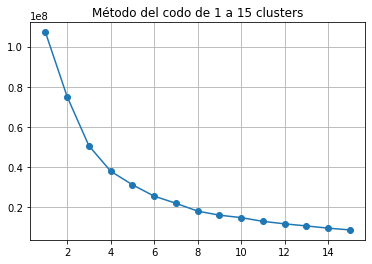

In [64]:
# Respuesta

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []

rs = 10
clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Método del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

**2.** Cuántos clusters propone usar para este dataset? Justifique su elección.

> Respuesta:

**3.** Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.

In [185]:
###### Respuesta

y_pred = KMeans(n_clusters = 4, n_init = 20, max_iter = 300, random_state = rs).fit_predict(X)
print(np.bincount(y_pred))

[249  91   4   2]


**4.** Al ejecutar el siguiente código varias veces, obtenemos resultados diferentes. Cómo podría evitar los resultados variables de K-means? Presente al menos 2 opciones para lograr esto. Puede implementarlo o describirlo.

> Respuesta: 

1. Para evitar la obtención de resultados diferentes en cada ejecución utilizamos el parámetro de _random_state_, que permite setear el mismo conjunto de valores aleatorios en cada ejecución

2. 

**5.** Ejecute el siguiente código que bajará la dimensionalidad de los datos de 7 a 2. Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters.

In [56]:
from sklearn.decomposition import PCA

new_X = PCA(n_components=2, random_state=0).fit_transform(X)

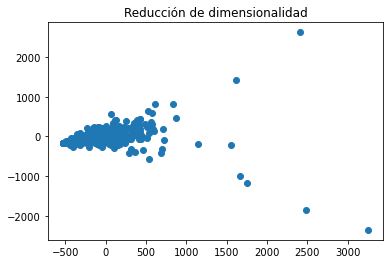

In [183]:
# Respuesta

plt.scatter(new_X[:,0],new_X[:,1])
plt.title("Reducción de dimensionalidad")
plt.show()

## Clustering Jerárquico Aglomerativo

**1.** Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.

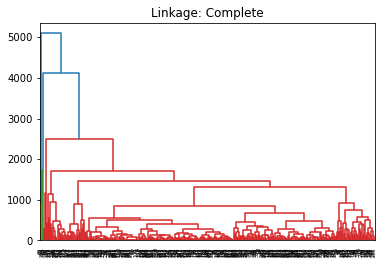

In [79]:
# Respuesta

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

complete = linkage(X, method = "complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")

#Complete dendrogram
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

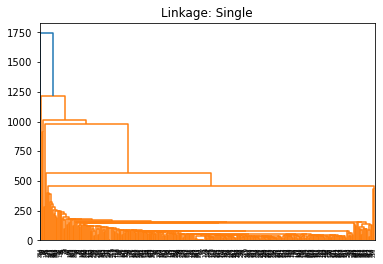

In [71]:
#Single dendrogram
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

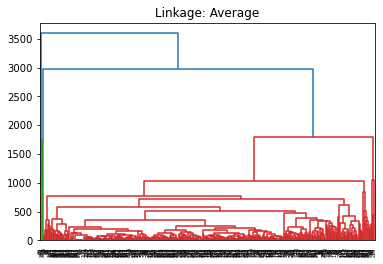

In [72]:
#Average dendrogram
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

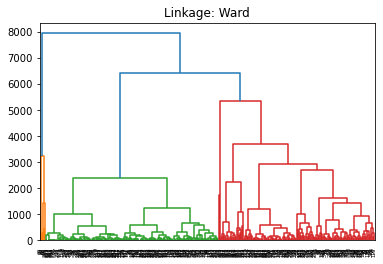

In [73]:
#Ward dendrogram
dendrogram(ward)
plt.title("Linkage: Ward")
#plt.axhline(y = 4000, color = "r", linestyle = "--")
plt.show()

**2.** Fijándose en el método `single`, a qué altura recomendaría cortar el árbol?

> Respuesta:

**3.** Ahora si miramos el método `ward`, cuántos clusters propone usar? A qué altura se debe cortar el arbol para obtener esa cantidad de clusters?

> Respuesta:

**4.** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta **2.** y **3.** y liste la asignación de clusters para cada punto del dataset para `single` y `ward`. Cuántos clusters se generan para el método `single` cortando a la altura que propuso en la pregunta **2.**?

In [181]:
# Respuesta
h = 1250
n = 6
single_h = AgglomerativeClustering(n_clusters = None, linkage = "single", distance_threshold = h).fit(X)
ward_n = AgglomerativeClustering(n_clusters = n, linkage = "ward").fit(X)

print("Single, h = {} \n\t N° de clusters: {}".format(h, single_h.n_clusters_))
print("Single labels:\n",single_h.labels_)
print("Ward labels:\n",ward_n.labels_)

Single, h = 1250 
	 N° de clusters: 2
Single labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Ward labels:
 [0 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 2 2 2 2 0 0 2 2 0 2 2 2
 0 2 2 2 2 2 2 0 0 0 2 2 0 0 0 0 2 2 2 0 2 0 2 4 2 0 2 2 2 0 4 4 5 5 0 0 0
 0 2 2 2 0 0 0 0 0 2 0 2 0 0 2 0 0 2 2 0 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2
 2 2

In [182]:
# # Respuesta
# h = 1250
# n = 6

# single_h = AgglomerativeClustering(n_clusters = None, linkage = "single", distance_threshold = h).fit(X)
# print("Single, h = {} \n\t N° de clusters: {}".format(h, single_h.n_clusters_))
# ward_n = AgglomerativeClustering(n_clusters = n, linkage = "ward").fit(X)
# print("Ward, n = {} \n\t N° de clusters: {}".format(n, ward_n.n_clusters_))

**5.** Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para objener esta información para los métodos `single` y `ward`.

In [168]:
# Respuesta
labels_single = np.bincount(single_h.labels_)
print("Single:")
for i, k in enumerate(labels_single):
    print("\tCluster {} -> n = {}".format(i, k))
    
labels_ward = np.bincount(ward_n.labels_)
print("Ward:")
for i, k in enumerate(labels_ward):
    print("\tCluster {} -> n = {}".format(i, k))

Single:
	Cluster 0 -> n = 345
	Cluster 1 -> n = 1
Ward:
	Cluster 0 -> n = 135
	Cluster 1 -> n = 24
	Cluster 2 -> n = 179
	Cluster 3 -> n = 2
	Cluster 4 -> n = 4
	Cluster 5 -> n = 2


**6.** Usando el dataset con dimensiones reducidas generado en la Parte 1, pregunta 5: `new_X`, grafique los datos y pinte los datos con su asignacion de cluster para los métodos `complete` y `ward` para tener una representación visual de los clusters.

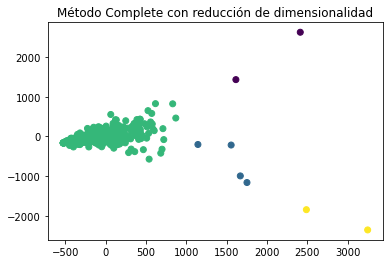

In [200]:
# Respuesta
complete_n =  AgglomerativeClustering(n_clusters = 4, linkage = "complete").fit(X)
plt.scatter(new_X[:,0], new_X[:,1], c = complete_n.labels_)
plt.title("Método Complete con reducción de dimensionalidad")
plt.show()

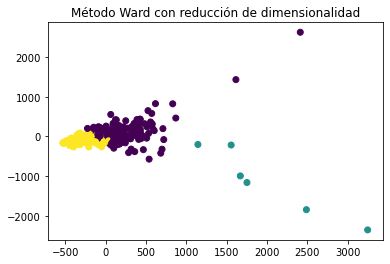

In [213]:
plt.scatter(new_X[:,0], new_X[:,1], c = ward_n.labels_)
plt.title("Método Ward con reducción de dimensionalidad")
plt.show()

# Parte 3: Problema Abierto

En esta pregunta usted deberá practicar un proceso reducido de minería de datos. Con el conjunto de datos que le daremos a continuación, usted deberá hacer una exploración de datos, aplicar las técnicas correspondientes de pre procesamiento de datos respecto a lo que encuentre y entrenar modelos de clasificación. Finalmente deberá evaluar los modelos que entrenó y justificar la elección de alguno de ellos.

Ejecute el siguiente código para cargar los datos que usaremos en esta parte. Los datos se encuentran en el archivo `movies.csv` adjunto en el zip.

**Estamos interesados en predecir la variable `imdb_score` a partir de los demas datos.** `imdb_score` es un entero y puede considerarlo como un variable categórica.

In [ ]:
# ponga aqui donde tiene el archivo
data_file = "movies.csv"

data = pd.read_csv(data_file)
data

## Exploración de datos

**1.** Explore el dataset y de una descripción del dataset. Algunos puntos que puede tocar son el número de datos en el dataset, número de features, tipos de cada features y rangos, datos erroneos, etc.
Aplique el preprocesamiento necesario tal que los datos queden usables para los modelos de clasificación.

Nota: Como la parte de exploración puede ser tan compleja y detallada como uno quiera, tendremos una pauta con lo mínimo que uno debería hacer en un dataset. Consideraremos análisis más detallados como un bonus a esta u otras tareas.

Como una guía para encaminar la exploración, puede considerar los siguientes hints.

**Hints generales:**
* Los datos no vienen limpios y tienen varios problemas que usted sabe como solucionar.
* Qué tipos de datos tiene cada columna?
* Cómo se relacionan las features?

**Hints para bonus:** (no todos los hints corresponden a un puro análisis o procesamiento que pueden hacer sobre los datos, 2 hints pueden corresponden a la misma recomendación)
* Hay features (categóricas) que no aportan información, qué análisis le serviría para ver cómo impactan en el score?
* Revise los nombres de actores y directores.
* Algunas features tienen outliers, encuéntrelos y limpie el dataset. Recuerde el boxplot.
* Qué pasa si hay features extremadamente relacionadas entre sí?
* Temporalmente, son todos los datos representativos al escenario actual?
* Considere el siguiente código y vea si le sirve para algún tipo de análisis:
```python
feature = "..."
# esto cuenta las ocurrencias de cada valor en 'feature'
count = data[feature].value_counts()
# esto calcula el score promedio por cada valor del 'feature'
avg_score = data.groupby(feature)["imdb_score"].mean()
# los juntamos en un mismo dataframe
count.to_frame().join(avg_score)
```


### Respuesta (no intente hacerlo todo en la misma celda)

## Entrenamiento y Evaluación

**2.** Escoja 2 modelos que hayan visto dentro del curso y entrénelos sobre los datos trabajados en la parte anterior. Recuerde aplicar buenas prácticas de entrenamiento vistas en clases y aplicadas en la tarea anterior. Evalúe los modelos en base a métricas vistas en el curso. Puede hacer gráficos o generar tablas para analizar y comparar los modelos.

In [ ]:
# Respuesta


## Conclusiones

**3.** Si este fuera un estudio encargado a usted por alguna empresa o cliente, basándose en los análisis que hizo anteriormente, qué conclusiones reportaría? Qué modelo propondría que fuera implementado en el producto del cliente? Por qué?

>Respuesta: